<a href="https://colab.research.google.com/github/kabeerbora/ASI_Maps/blob/main/asi_80s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# prompt: set directory

import os
os.chdir('\Desktop\Unnecessary_research\Highways_India\ecoj12207-sup-0002-datas1\01. Data\Districts')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 8-9: truncated \UXXXXXXXX escape (<ipython-input-3-bef2e452c6b0>, line 4)

## Upload File

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
for fn in uploaded.keys():
  df = pd.read_excel(io.BytesIO(uploaded[fn]))
  print(df)


## Read the File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'all_added')
df.head()

In [ ]:
if 'contract_share' in df.columns:
  df = df.drop('contract_share', axis=1)
  print("contract_share column deleted successfully.")
else:
  print("contract_share column not found in the DataFrame.")

contract_share column deleted successfully.


In [ ]:
df['contract_share'] = df['Number of Workers - Employed Through Contractors'] / df['Total Persons Engaged']
df['labor_share'] = df['Wages and Salaries - Workers'] / df['Net Value Added']

In [ ]:
yearly_change_labor_share = df.groupby(['state', 'ind_code', 'year'])['labor_share'].mean().pct_change()
yearly_change_contract_share = df.groupby(['state', 'ind_code', 'year'])['contract_share'].mean().pct_change()
yearly_change_labor_share = yearly_change_labor_share.reset_index(name='YearlyChangeLaborShare')
yearly_change_contract_share = yearly_change_contract_share.reset_index(name='YearlyChangeContractShare')
yearly_changes = pd.merge(yearly_change_labor_share, yearly_change_contract_share, on=['state', 'ind_code', 'year'], how='inner')
yearly_changes
df_1 = pd.merge(yearly_changes, df, on=['state', 'ind_code', 'year'], how='inner')
df_1

,state,ind_code,year,ind,Number of Factories,Fixed Capital,Working Capital,Physical Working Capital,Productive Capital,Invested Capital,...,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,CPI,contract_share,labor_share,ls_change,cs_change,real_wage,avg_prod,real_wage_worker
0,AP,016,1980 - 1981,016 - support activities to agriculture and po...,279,467,262,612,729,1079,...,0,19108,NaN,0.000000,0.434579,NaN,NaN,NaN,NaN,NaN
1,AP,016,1981 - 1982,016 - support activities to agriculture and po...,287,610,276,581,887,1191,...,0,20772,NaN,0.000000,0.456432,0.050283,NaN,NaN,NaN,NaN
2,AP,016,1982 - 1983,016 - support activities to agriculture and po...,273,614,461,833,1075,1447,...,0,23876,NaN,0.000000,0.432364,-0.052730,NaN,NaN,NaN,NaN
3,AP,016,1983 - 1984,016 - support activities to agriculture and po...,334,844,1538,1656,2382,2499,...,0,16848,NaN,0.000000,0.185743,-0.570401,NaN,NaN,NaN,NaN
4,AP,016,1984 - 1985,016 - support activities to agriculture and po...,370,1037,767,1562,1805,2600,...,0,21974,NaN,0.000000,0.247804,0.334123,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55058,West Bengal,Total,2017 - 2018,Total,9534,11743291,2283569,5180424,14026860,16923715,...,471164,661703,1318.777,0.243445,0.210369,-0.154629,-0.005097,592668.055327,5.452035,1.146937
55059,West Bengal,Total,2018 - 2019,Total,9420,12418268,170256,5473662,12588524,17891930,...,478577,699666,1351.042,0.292482,0.210580,0.001007,0.201427,651722.152235,5.607984,1.180932
55060,West Bengal,Total,2019 - 2020,Total,9650,13300889,94281,6428042,13395170,19728930,...,516406,734403,1423.666,0.285459,0.250753,0.190770,-0.024010,655727.537217,4.509597,1.130795
55061,West Bengal,Total,2020 - 2021,Total,9863,12527544,4682020,6272404,17209564,18799949,...,528016,673090,1395.287,0.274463,0.190987,-0.238347,-0.038520,635175.415524,6.382475,1.218969


In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
  df_1.to_excel(writer, sheet_name='asli_data', index=False)

In [ ]:
df_total = df[df['ind_code'] == 'Total']
df_total['year'] = df_total['year'].astype(str).str.split('-').str[0]
df_total
df = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/price_indices.xlsx')

In [ ]:
df_total['year'] = df_total['year'].astype(int)
df['year'] = df['year'].astype(int)
df_total = df_total.groupby('year', as_index=False).sum()
df = df.groupby('year', as_index=False).sum()
df_total
df_total = pd.merge(df_total, df, on='year', how='outer')

,year,ind_code,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Rent Paid,Total Emoluments,Total Input,Total Persons Engaged,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,wpi,cpi_iw
0,1980,Total,256214.0,183519.0,2949670.0,519989.0,1345915.0,261043.0,4625042.0,325484.0,...,11672.0,608814.0,4527282.0,8121660.0,0.0,0.0,390214.0,1311302.0,257.200000,0.0000
1,1981,Total,276800.0,208165.0,3413042.0,700413.0,1600782.0,312733.0,5323594.0,476173.0,...,12457.0,671061.0,5452411.0,7757400.0,0.0,0.0,434152.0,1486841.0,281.300000,0.0000
2,1982,Total,246735.0,235427.0,3769789.0,765953.0,1855048.0,393046.0,5956488.0,505607.0,...,13753.0,799208.0,6423549.0,8023545.0,0.0,0.0,508666.0,1619958.0,295.083700,0.0000
3,1983,Total,158421.0,325317.0,4777533.0,947866.0,2236685.0,455727.0,7149181.0,601018.0,...,15496.0,911638.0,6782397.0,8029829.0,0.0,0.0,585650.0,1835586.0,317.306400,0.0000
4,1984,Total,147319.0,390388.0,5383198.0,1008108.0,2384040.0,518418.0,7927014.0,601538.0,...,17528.0,1053487.0,7819867.0,7857961.0,0.0,0.0,667750.0,2214564.0,337.841300,0.0000
5,1985,Total,290984.0,423605.0,5900952.0,1064354.0,2653613.0,593730.0,8677929.0,611241.0,...,22729.0,1095834.0,8951217.0,7465449.0,0.0,0.0,701733.0,2357468.0,352.750200,0.0000
6,1986,Total,264743.0,442791.0,6599946.0,1090859.0,2897012.0,681156.0,9619692.0,619166.0,...,24363.0,1213534.0,9932704.0,7424368.0,0.0,0.0,775267.0,2157263.0,373.285100,0.0000
7,1987,Total,441656.0,599471.0,7695791.0,1412368.0,3312482.0,830305.0,11209773.0,786907.0,...,30002.0,1386961.0,11510225.0,7759035.0,0.0,0.0,880756.0,2729132.0,403.665500,0.0000
8,1988,Total,915436.0,687307.0,8771477.0,1494469.0,4165250.0,932413.0,13116421.0,777455.0,...,41171.0,1553240.0,13723105.0,7732946.0,0.0,0.0,1017721.0,2702493.0,434.045900,0.0000
9,1989,Total,694776.0,835140.0,10504227.0,1989015.0,4889378.0,1169026.0,15653402.0,1120113.0,...,50159.0,1811838.0,17131663.0,8105360.0,0.0,0.0,1162551.0,3345737.0,466.114100,0.0000


In [ ]:
df_sab = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'all_added')
df_sab['real_wage_worker'] = (df_sab['Wages and Salaries - Workers']) / df_1['Net Value Added']

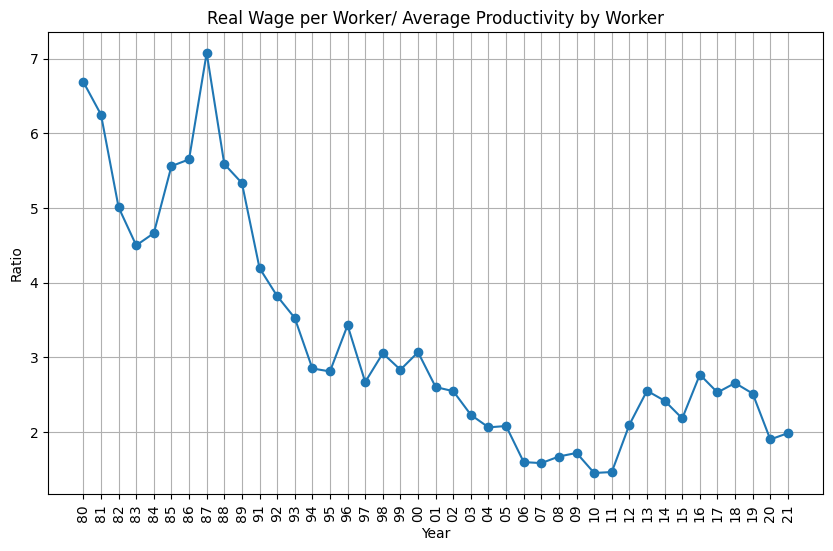

In [ ]:
import matplotlib.pyplot as plt

df_sab_total = df_sab[df_sab['ind_code'] == 'Total']
real_wage_worker_by_year = df_sab_total.groupby('year')['real_wage_worker'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(real_wage_worker_by_year.index, real_wage_worker_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Real Wage per Worker/ Average Productivity by Worker')
plt.grid(True)

# Customize x-axis tick labels
years = real_wage_worker_by_year.index.tolist()  # Get the years as a list
def format_year(year_str):
    start_year = int(year_str.split('-')[0])
    # Check if the year is between 2000 and 2009
    if 2000 <= start_year <= 2009:
        return '0' + str(start_year % 100) if start_year % 100 < 10 else str(start_year % 100) # Add leading zero for single-digit years
    else:
        return str(start_year % 100)

formatted_years = [format_year(year) for year in years]

plt.xticks(years, formatted_years, rotation='vertical')  # Set labels and rotate vertically
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Bora-Sarangi/divergence.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
df_1['real_wage'] = (df_1['Wages and Salaries - Workers'] * 1000) / df_1['CPI']
df_1['avg_prod'] = (df_1['Net Value Added'] * 1000) / (df_1['Number of Workers'] * df_1['CPI'])
df_1['real_wage_worker'] = (df_1['real_wage']) / df_1['Number of Workers']
df_1.sample(5)

,state,ind_code,year,ind,Number of Factories,Fixed Capital,Working Capital,Physical Working Capital,Productive Capital,Invested Capital,...,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,CPI,contract_share,labor_share,ls_change,cs_change,real_wage,avg_prod,real_wage_worker
52531,West Bengal,151,1991 - 1992,151 - tanning and dressing of leather; manufac...,120,1234,2225,4503,3459,5737,...,0,2649,NaN,0.000000,0.137847,-0.238866,NaN,NaN,NaN,NaN
34419,Maharashtra,272,2001 - 2002,272 - manufacture of batteries and accumulators,38,10266,3451,4207,13717,14474,...,481,1648,499.3000,0.098566,0.156131,-0.029097,-0.251915,1978.770278,11.225636,1.752675
15914,"Goa, Daman & Diu",332,1986 - 1987,332 - installation of industrial machinery and...,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
52871,West Bengal,192,2003 - 2004,192 - manufacture of refined petroleum products,41,217821,104355,118084,322176,335905,...,3298,3908,499.0833,0.302201,0.126973,-0.385383,-0.157182,10607.447695,30.918270,3.925776
21046,Haryana,259,1994 - 1995,259 - manufacture of other fabricated metal pr...,318,10680,7152,10407,17832,21087,...,0,10902,NaN,0.000000,0.321301,-0.021991,NaN,NaN,NaN,NaN


## Process the dataframe

In [ ]:
new_df = df.copy()
new_df = new_df.loc[(new_df['ind']!='Total') | (new_df['ind']!='Others')].fillna(value=0)
new_df.loc[new_df['state'].isin(['Andhra Pradesh','Telangana']), 'state'] = 'AP'
new_df.loc[new_df['state'].isin(['Bihar','Jharkhand']), 'state'] = 'BR'
new_df.loc[new_df['state'].isin(['Madhya Pradesh','Chhattisgarh']), 'state'] = 'MP'
new_df.loc[new_df['state'].isin(['Uttar Pradesh','Uttarakhand']), 'state'] = 'UP'
new_df['ind_code'] = new_df['ind'].apply(lambda x: x.split("-")[0].strip())

new_df = new_df.groupby(['state','year','ind_code']).sum().reset_index()
new_df['contract_share'] = new_df['Number of Workers - Employed Through Contractors'].to_numpy()/new_df['Number of Workers'].to_numpy()
new_df.head(5)
df.head(5)

In [ ]:
grouped_df = df.groupby(['state', 'year'])[df.columns.difference(['state', 'year'])].sum().reset_index()
total_df = df.groupby(['ind_code', 'year'])[df.columns.difference(['ind_code', 'year'])].sum().reset_index()


,ind_code,year,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Total Input,Total Persons Engaged,Unnamed: 0,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,contract_share,ind,state
0,016,1980 - 1981,82,389,5055,770,4137,872,8434,382,...,35414,175667,440504,0,0,1682,2900,0.0,016 - support activities to agriculture and po...,"APAssamBRDelhiGoa, Daman & DiuGujaratHaryanaKa..."
1,016,1981 - 1982,108,408,5555,922,4058,903,8699,514,...,39220,163978,441847,0,0,1588,3337,0.0,016 - support activities to agriculture and po...,"APAssamBRDelhiGoa, Daman & DiuGujaratHaryanaKa..."
2,016,1982 - 1983,910,459,5930,896,5418,887,9654,437,...,46253,177561,443190,0,0,2215,3271,0.0,016 - support activities to agriculture and po...,"APAssamBRDelhiGoa, Daman & DiuGujaratHaryanaKa..."
3,016,1983 - 1984,839,549,6639,713,9906,1084,11451,167,...,39135,124142,444533,0,0,2325,5494,0.0,016 - support activities to agriculture and po...,"APAssamBRDelhiGoa, Daman & DiuGujaratHaryanaKa..."
4,016,1984 - 1985,539,715,7493,906,6801,2046,12695,192,...,51312,115948,445876,0,0,2474,4423,0.0,016 - support activities to agriculture and po...,"APAssamBRDelhiGoa, Daman & DiuGujaratHaryanaKa..."


In [ ]:
total_df = total_df.drop(columns=['contract_share', 'ind', 'state', 'Unnamed: 0'])
total_df.head(5)

,ind_code,year,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Physical Working Capital,Productive Capital,Rent Paid,Total Emoluments,Total Input,Total Persons Engaged,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital
0,016,1980 - 1981,82,389,5055,770,4137,872,8434,382,...,3378,7955,56,2110,35414,175667,0,0,1682,2900
1,016,1981 - 1982,108,408,5555,922,4058,903,8699,514,...,3145,8891,64,2108,39220,163978,0,0,1588,3337
2,016,1982 - 1983,910,459,5930,896,5418,887,9654,437,...,3721,9201,68,2725,46253,177561,0,0,2215,3271
3,016,1983 - 1984,839,549,6639,713,9906,1084,11451,167,...,4812,12131,72,3067,39135,124142,0,0,2325,5494
4,016,1984 - 1985,539,715,7493,906,6801,2046,12695,192,...,5201,11916,66,3114,51312,115948,0,0,2474,4423


In [ ]:
df_1 = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name='states_added')
df_1.head(5)

,state,year,CPI,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,...,Physical Working Capital,Productive Capital,Rent Paid,Total Emoluments,Total Input,Total Persons Engaged,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital
0,AP,1980 - 1981,NaN,21105,22593,364249,68286,139324,35377,549194,...,184950,470770,0,67394,497516,1412562,0,0,41362,106526
1,AP,1981 - 1982,NaN,29363,26141,387359,62498,165106,38406,584414,...,197053,514784,0,68872,531725,1482206,0,0,45293,127426
2,AP,1982 - 1983,NaN,31859,26741,471400,87958,229910,45984,714512,...,243110,610789,0,100822,719566,1558258,0,0,57213,139390
3,AP,1983 - 1984,NaN,41230,46111,577466,143811,306497,57538,872091,...,294627,772398,0,108593,830708,1484798,0,0,67779,194937
4,AP,1984 - 1985,NaN,16574,51483,631742,122082,337955,63820,960215,...,328473,826038,0,130354,913922,1401250,0,0,77144,194297


In [ ]:
merged_df = pd.merge(new_df, df_1[['year', 'state', 'CPI']], on=['year', 'state'], how='left')
merged_df.loc[(merged_df['state'] == 'MP') & (merged_df['year'] == '2010 - 2011')]
with pd.ExcelWriter('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', mode='a', if_sheet_exists='replace') as writer:
    merged_df.to_excel(writer, sheet_name='asli_data', index=False)

In [ ]:
merged_df['Real Wages'] = merged_df['Wages and Salaries - Workers'] / (merged_df['CPI']/100)
merged_df['Real Wage Rate'] = merged_df['Real Wages'] / (merged_df['Number of Workers'])
merged_df['Avg Labor Productivity'] = merged_df['Net Value Added']/(merged_df['Number of Workers'] * merged_df['CPI'])

In [ ]:
new_columns = ['state','year','ind_code','Total Input', 'Fixed Capital','Net Value Added', 'Gross Value Added', 'Number of Workers', 'Number of Workers - Employed Through Contractors', 'Wages and Salaries - Workers']
new_df = df[new_columns]
new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce')
new_df = new_df[new_df['year'] >= 1998]
new_df.head(5)

In [ ]:
new_df['new_year'] = new_df['year'].str.split(' - ').str[0].astype(int)
new_df = new_df[new_df['new_year'] >= 1998]
new_df.head(5)

,state,year,ind_code,Total Input,Fixed Capital,Net Value Added,Gross Value Added,Number of Workers,Number of Workers - Employed Through Contractors,Wages and Salaries - Workers,new_year
1343,AP,1998 - 1999,016,125601,3822,9050,9609,18567,4845,2260,1998
1344,AP,1998 - 1999,089,16,4,115,115,1364,0,86,1998
1345,AP,1998 - 1999,101,0,0,0,0,0,0,0,1998
1346,AP,1998 - 1999,102,0,0,0,0,0,0,0,1998
1347,AP,1998 - 1999,103,0,0,0,0,0,0,0,1998


In [ ]:
!pip -q install pyreadstat
import pyreadstat
import pandas as pd
from google.colab import drive
drive.mount("/gdrive")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.5 MB/s eta 0:00:00
Mounted at /gdrive


In [ ]:
new_df.to_excel('/gdrive/My Drive/pal_rathore.xlsx', index=True)

In [ ]:
# prompt: calculate change in gross value added new_df and add to new_df

new_df['Change in Gross Value Added'] = new_df.groupby(['state', 'ind_code'])['Gross Value Added'].diff()
new_df['Change in Employment'] = new_df.groupby(['state', 'ind_code'])['Number of Workers'].diff()
new_df.head(5)
new_df.to_excel('/gdrive/My Drive/pal_rathore.xlsx', index=True)

In [ ]:
import numpy as np

new_df['Log Gross Value Added'] = np.log(new_df['Gross Value Added'])
new_df['Change in Log Gross Value Added'] = new_df.groupby(['state', 'ind_code'])['Log Gross Value Added'].diff()
new_df['Log Employment'] = np.log(new_df['Number of Workers'])
new_df['Change in Employment'] = new_df.groupby(['state', 'ind_code'])['Log Employment'].diff()
new_df['Log K'] = np.log(new_df['Fixed Capital'])
new_df['Change in K'] = new_df.groupby(['state', 'ind_code'])['Log K'].diff()

new_df.head(5)
new_df.to_excel('/gdrive/My Drive/pal_rathore.xlsx', index=True)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np


# Function to create scatter plot
def plot_scatter(state, x_var, y_var, transform_x_var, transform_y_var, xlag, ylag):
    filtered_df = new_df[new_df['state'] == state].copy()

    # Handling x variable transformation
    if transform_x_var:
        try:
            filtered_df['x_transformed'] = filtered_df[x_var] / filtered_df[transform_x_var]
        except ZeroDivisionError:
            filtered_df['x_transformed'] = float('nan')
        x_data = filtered_df['x_transformed']
        x_label = f'{x_var} / {transform_x_var}'
    else:
        x_data = filtered_df[x_var]
        x_label = x_var

    # Handling y variable transformation
    if transform_y_var:
        try:
            filtered_df['y_transformed'] = filtered_df[y_var] / filtered_df[transform_y_var]
        except ZeroDivisionError:
            filtered_df['y_transformed'] = float('nan')
        y_data = filtered_df['y_transformed']
        y_label = f'{y_var} / {transform_y_var}'
    else:
        y_data = filtered_df[y_var]
        y_label = y_var

    # Handling x variable lag
    if xlag:
        try:
            filtered_df['xlagged'] = filtered_df[x_var].shift(1)  # Assuming a lag of 1
        except ZeroDivisionError:
            filtered_df['xlagged'] = float('nan')
        x_data = filtered_df['xlagged']
        x_label = f'{x_var} lagged'
    else:
        x_data = filtered_df[x_var]
        x_label = x_var

    # Handling y variable lag
    if ylag:
        try:
            filtered_df['ylagged'] = filtered_df[y_var].shift(1)  # Assuming a lag of 1
        except ZeroDivisionError:
            filtered_df['ylagged'] = float('nan')
        y_data = filtered_df['ylagged']
        y_label = f'{y_var} lagged'
    else:
        y_data = filtered_df[y_var]
        y_label = y_var

    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter Plot for {state}')
    plt.show()

# Create widgets
state_dropdown = widgets.Dropdown(
    options=new_df['state'].unique(),
    value=new_df['state'].unique()[0],
    description='State:'
)

x_var_dropdown = widgets.Dropdown(
    options=[None] + [col for col in new_df.columns if col not in ['state']],
    value=None,
    description='X Variable:'
)

y_var_dropdown = widgets.Dropdown(
    options=[None] + [col for col in new_df.columns if col not in ['state']],
    value=None,
    description='Y Variable:'
)

transform_x_var_dropdown = widgets.Dropdown(
    options=[None] + [col for col in new_df.columns if col not in ['state', 'x_var']],
    value=None,
    description='Divide X by:'
)

transform_y_var_dropdown = widgets.Dropdown(
    options=[None] + [col for col in new_df.columns if col not in ['state', 'y_var']],
    value=None,
    description='Divide Y by:'
)

lag_dropdown_x = widgets.Checkbox(
    value=False,
    description='Lag X Variable'
)

lag_dropdown_y = widgets.Checkbox(
    value=False,
    description='Lag Y Variable'
)

# Create interactive output
out = widgets.interactive_output(
    plot_scatter,
    {
        'state': state_dropdown,
        'x_var': x_var_dropdown,
        'y_var': y_var_dropdown,
        'transform_x_var': transform_x_var_dropdown,
        'transform_y_var': transform_y_var_dropdown,
        'xlag': lag_dropdown_x,
        'ylag': lag_dropdown_y
    }
)

# Display widgets and output
display(state_dropdown, x_var_dropdown, y_var_dropdown, transform_x_var_dropdown, transform_y_var_dropdown, lag_dropdown_x, lag_dropdown_y, out)


NameError: name 'new_df' is not defined

In [ ]:
req_cols = ['state','year','ind', 'Number of Workers', 'Number of Workers - Employed Through Contractors', 'contract_share']
new_df.loc[(new_df['Number of Workers - Employed Through Contractors']>0) &  (new_df['Number of Workers']==0)][req_cols]

,state,year,ind,Number of Workers,Number of Workers - Employed Through Contractors,contract_share


In [ ]:
new_df.loc[(new_df['year']=="2018 - 2019") & (new_df['state'].isin(['MP']))]

,state,year,ind_code,ind,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,...,Wages and Salaries - Workers,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid,contract_share
32074,MP,2018 - 2019,016,016016,148.0,2518.0,20708.0,27552.0,30070.0,173.0,...,1743.0,1678.0,3195.0,88447.0,79302.0,105979.0,600456.0,0.0,6311.0,0.367944
32075,MP,2018 - 2019,089,089089,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32076,MP,2018 - 2019,101,101101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32077,MP,2018 - 2019,102,102102,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32078,MP,2018 - 2019,103,103103,25.0,3444.0,10594.0,12496.0,15939.0,7730.0,...,2647.0,1523.0,2992.0,15851.0,44255.0,52083.0,59414.0,0.0,1861.0,0.704098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32148,MP,2018 - 2019,382,382382,3.0,790.0,1349.0,1517.0,2308.0,384.0,...,103.0,128.0,138.0,266.0,2511.0,2475.0,1314.0,0.0,167.0,0.560000
32149,MP,2018 - 2019,383,383383,31.0,426.0,1407.0,1651.0,2078.0,1870.0,...,231.0,215.0,319.0,1916.0,5684.0,6284.0,8603.0,0.0,241.0,0.328502
32150,MP,2018 - 2019,581,581581,12.0,1694.0,7677.0,7975.0,9668.0,-1436.0,...,846.0,1519.0,1216.0,3303.0,19192.0,16555.0,21211.0,0.0,289.0,0.011976
32151,MP,2018 - 2019,Oth,OthOth,559.0,413151.0,-130588.0,633853.0,1047004.0,649276.0,...,41878.0,35789.0,29865.0,244651.0,8883514.0,10717100.0,2454673.0,0.0,762597.0,0.344044


In [ ]:
df.loc[(df['year']=="2018 - 2019") & (df['state'].isin(['Madhya Pradesh']))]

,year,ind,state,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,Gross Fixed Capital Formation,...,Wages and Salaries - Workers,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid,contract_share


In [ ]:
new_df['contract_share'] = new_df['Number of Workers - Employed Through Contractors'] / new_df['Total Persons Engaged']
new_df.head(5)

,state,year,ind_code,ind,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,...,Wages and Salaries - Workers,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid,contract_share
0,AP,1980 - 1981,016,016016,279.0,39.0,320.0,428.0,467.0,51.0,...,186.0,0.0,19108.0,612.0,729.0,1079.0,6522.0,0.0,78.0,0.0
1,AP,1980 - 1981,089,089089,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,AP,1980 - 1981,101,101101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,AP,1980 - 1981,102,102102,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,AP,1980 - 1981,103,103103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# prompt: sum all the Number of Workers - Employed Through Contractors and Total Persons Engaged for all the industries except 'Total' by year & state and create a new df with these variables only.

# Filter out 'Total' ind values
filtered1_df = new_df[new_df['ind'] != 'Total']

# Calculate the sum for all 'ind' except 'Total'
sum_df = filtered1_df.groupby(['state', 'year'])[['Number of Workers - Employed Through Contractors', 'Total Persons Engaged']].sum().reset_index()

# Display the result
sum_df.head(5)

sum_df['contract_share'] = sum_df['Number of Workers - Employed Through Contractors'] / sum_df['Total Persons Engaged']
sum_df.sample(5)


,state,year,Number of Workers - Employed Through Contractors,Total Persons Engaged,contract_share
45,Assam,1984 - 1985,0.0,228468.0,0.000000
474,Orissa,2004 - 2005,87204.0,291493.0,0.299163
199,"Goa, Daman & Diu",2016 - 2017,0.0,0.0,NaN
175,"Goa, Daman & Diu",1992 - 1993,0.0,0.0,NaN
265,Haryana,2000 - 2001,114747.0,499560.0,0.229696


In [ ]:
# prompt: can you create an interactive line plot for the contract share variable using plotly and group it by state for BR, AP and Maharashtra , y -axis=contract_share, x=year

import plotly.express as px

# Filter the dataframe for the specified states
filtered_df = sum_df[sum_df['state'].isin(['BR', 'AP', 'Maharashtra','Uttar Pradesh','Delhi','Gujarat','Assam','West Bengal','Orissa','Tamil Nadu','Kerala', 'Karnataka','MP','Haryana','Uttar Pradesh','Total'])].groupby(['state', 'year']).sum().reset_index()
# Create the interactive line plot
fig = px.line(sum_df, x='year', y='contract_share', color='state',
              title='Contract Share by State', range_x=['1997 - 1998', '2021 - 2022'])

# Show the plot
fig.show()


In [ ]:
# prompt: convert ind_code to numeric
print(new_df['ind_bin'].unique())
# Convert 'ind_code' to numeric, handling potential errors
new_df['ind_code'] = pd.to_numeric(new_df['ind_code'], errors='coerce')


In [ ]:
# prompt: rename the ind_code 'Oth' with a number 900

new_df['ind_code'] = new_df['ind_code'].replace('Oth', 900)
print(new_df['ind_code'].unique())


[ 16  89 101 102 103 104 105 106 107 108 110 120 131 139 141 142 143 151
 152 161 162 170 181 182 191 192 201 202 203 210 221 222 231 239 241 242
 243 251 252 259 261 262 263 264 265 266 267 268 271 272 273 274 275 279
 281 282 291 292 293 301 302 303 304 309 310 321 322 323 324 325 329 331
 332 381 382 383 581 900]


In [ ]:
# prompt: [ 16  89 101 102 103 104 105 106 107 108 110 120 131 139 141 142 143 151
#  152 161 162 170 181 182 191 192 201 202 203 210 221 222 231 239 241 242
#  243 251 252 259 261 262 263 264 265 266 267 268 271 272 273 274 275 279
#  281 282 291 292 293 301 302 303 304 309 310 321 322 323 324 325 329 331
#  332 381 382 383 581 900]
#  These are the industries, bin them from 16 to 105 then 106 to 139 etc for the res

# Define the bins and labels
bins = [15, 105, 139, 203, 275, 332, 581, 901]  # Adjust these values as needed
labels = ['16-105', '106-139', '141-203', '204-275', '276-332', '333-581', '582-900']
# Create the 'ind_bin' column
new_df['ind_bin'] = pd.cut(new_df['ind_code'], bins=bins, labels=labels, include_lowest=True)
new_df.head(5)

,state,year,ind_code,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,Gross Fixed Capital Formation,...,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid,contract_share,ind_bin
0,AP,1980 - 1981,16,279.0,39.0,320.0,428.0,467.0,51.0,90.0,...,0.0,19108.0,612.0,729.0,1079.0,6522.0,0.0,78.0,0.0,16-105
1,AP,1980 - 1981,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,16-105
2,AP,1980 - 1981,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,16-105
3,AP,1980 - 1981,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,16-105
4,AP,1980 - 1981,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,16-105


In [ ]:
# prompt: now sum all the values for all the columns except state year ind_code by ind_bin, do it by state and year

# Group by state, year, and ind_bin, then sum the values for all other columns
grouped_df = new_df.groupby(['state', 'year', 'ind_bin']).sum().reset_index()
grouped_df.drop('ind_code', axis=1, inplace=True)
grouped_df.drop('contract_share', axis=1, inplace=True)
# Display the result
grouped_df.head(5)

,state,year,ind_bin,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,Gross Fixed Capital Formation,...,Wages and Salaries - Workers,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid,contract_share
0,AP,1980 - 1981,16-105,729.0,317.0,2354.0,2819.0,3135.0,305.0,622.0,...,853.0,0.0,38964.0,3596.0,5726.0,6920.0,30786.0,0.0,376.0,0.0
1,AP,1980 - 1981,106-139,7695.0,1480.0,9625.0,14653.0,16134.0,562.0,2043.0,...,7823.0,0.0,391489.0,20513.0,23909.0,34355.0,73969.0,0.0,4692.0,0.0
2,AP,1980 - 1981,141-203,494.0,2202.0,2681.0,5154.0,7357.0,8347.0,10548.0,...,1280.0,0.0,36672.0,10350.0,44760.0,45778.0,28817.0,0.0,2393.0,0.0
3,AP,1980 - 1981,204-275,1490.0,2464.0,10117.0,14073.0,16533.0,3072.0,5535.0,...,3620.0,0.0,92051.0,27701.0,37228.0,51083.0,57275.0,0.0,3657.0,0.0
4,AP,1980 - 1981,276-332,377.0,834.0,4161.0,5229.0,6064.0,561.0,1394.0,...,2079.0,0.0,34548.0,10835.0,13847.0,19483.0,12904.0,0.0,1019.0,0.0


In [ ]:
# Group by ind_bin and year, then sum the values for all other columns
grouped_by_bin_year = grouped_df.groupby(['ind_bin', 'year']).sum().reset_index()

# Display the result
grouped_by_bin_year.drop(['state', 'contract_share'], axis=1, inplace=True)
grouped_by_bin_year.head(5)

,ind_bin,year,Number of Factories,Depreciation,Net Income,Net Value Added,Gross Value Added,Net Fixed Capital Formation,Gross Fixed Capital Formation,Additions to Total Stock,...,Wages and Salaries - Total,Wages and Salaries - Workers,Wages and Salaries - Supervisory and Managerial Staff,Number of Employees,Physical Working Capital,Productive Capital,Invested Capital,Total Input,Rent Paid,Interest Paid
0,16-105,1980 - 1981,198487.0,375546.0,1817194.0,2382018.0,2757546.0,655977.0,1045492.0,517791.0,...,0.0,789203.0,0.0,15602378.0,3409431.0,8604343.0,9350945.0,9543565.0,23686.0,533101.0
1,16-105,1981 - 1982,215156.0,425307.0,2175656.0,2848861.0,3274198.0,959581.0,1406093.0,552444.0,...,0.0,877640.0,0.0,15637462.0,3878355.0,9882973.0,10749380.0,11442069.0,25318.0,639411.0
2,16-105,1982 - 1983,191384.0,480428.0,2477171.0,3317496.0,3797934.0,1025504.0,1536120.0,500245.0,...,0.0,1028527.0,0.0,16101466.0,4436704.0,10871220.0,12023849.0,13454158.0,27923.0,800681.0
3,16-105,1983 - 1984,197919.0,663969.0,2954519.0,3930406.0,4594350.0,1206762.0,1899208.0,320335.0,...,0.0,1184327.0,0.0,15659729.0,4816790.0,13350842.0,14430488.0,14227809.0,31631.0,930875.0
4,16-105,1984 - 1985,198239.0,795589.0,2998798.0,4107416.0,4902985.0,1209910.0,2023011.0,301644.0,...,0.0,1349656.0,0.0,15738614.0,5175118.0,15320738.0,16008274.0,16411527.0,35578.0,1057178.0


In [ ]:
# prompt: using grouped_by_bin_year, create variable contract_share
grouped_by_bin_year['contract_share'] = grouped_by_bin_year['Number of Workers - Employed Through Contractors'] / grouped_by_bin_year['Total Persons Engaged']


In [ ]:
# prompt: can you create a plot using plotly that plots contract_share for all the ind_bins

import plotly.express as px

# Create the interactive line plot
fig = px.line(grouped_by_bin_year, x='year', y='contract_share', color='ind_bin',
              title='Contract Share by Industry Bin', range_x=['1997 - 1998', '2021 - 2022'])

# Show the plot
fig.show()
fig.write_html("plot.html")

In [ ]:
ap_df = filtered_df.loc[(filtered_df['state']=="Uttar Pradesh"), ['contract_share', 'Number of Workers - Employed Through Contractors','Number of Workers']]
ap_df

,contract_share,Number of Workers - Employed Through Contractors,Number of Workers
492,0.000000,0.0,335112.0
493,0.000000,0.0,345174.0
494,0.000000,0.0,333424.0
495,0.000000,0.0,279562.0
496,0.000000,0.0,281859.0
497,0.000000,0.0,252399.0
498,0.000000,0.0,264345.0
499,0.000000,0.0,295643.0
500,0.000000,0.0,276352.0
501,0.000000,0.0,300659.0


In [ ]:
ap_df['Number of Workers - Employed Through Contractors']/ap_df['Number of Workers']

,0
492,0.000000
493,0.000000
494,0.000000
495,0.000000
496,0.000000
497,0.000000
498,0.000000
499,0.000000
500,0.000000
501,0.000000


In [ ]:
fig.write_html("plot.html")

In [ ]:
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from threading import Thread
import time
from google.colab import files

def convert_year_range(year_range):
    start_year, end_year = map(int, year_range.split(' - '))
    return (start_year + end_year) / 2

new_df['Year'] = new_df['year'].apply(convert_year_range)

app = dash.Dash(__name__)
app = Dash(__name__)
run_with_ngrok(app)

app.layout = html.Div([
    dcc.Dropdown(
        id='variable-dropdown',
        options=[{'label': col, 'value': col} for col in new_df.columns if col not in ['state', 'year','ind','ind_code','Year']],
        value=new_df.columns[2],  # Default value
        style={'width': '50%'}
    ),
    dcc.Graph(id='line-plot')
])

# Callback to update the plot based on the selected variable
@app.callback(
    Output('line-plot', 'figure'),
    [Input('variable-dropdown', 'value')]
)
def update_plot(selected_variable):
    # Filter the dataframe for the selected variable
    filtered_df = new_df.groupby(['state', 'Year'])[selected_variable].sum().reset_index()

    # Create the interactive line plot
    fig = px.line(filtered_df, x='Year', y=selected_variable, color='state',
                  title=f'{selected_variable} by state')
    return fig

if __name__ == '__main__':
    app.run_server()

ModuleNotFoundError: No module named 'dash'

In [ ]:
filtered_df.loc[(filtered_df['state']=="Gujarat") & (filtered_df['year']=="2010 - 2011")]

In [ ]:
# prompt: upload xlsx file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_excel('/content/common_ids.xlsx')
df_merged = df.copy()

,dsl,scheme_code,nic_code,state_code_x,state_code_y,district_code,sector_code,year,ownership,opening_gross_value,...,rent_rcvd_bldg,rent_royalties_y,int_received,rent_rcvd_land,gross_value,bonus,prov_fund,wel_exp,fact_id,yr
0,10001,1,24130,5,5,1,1,2000,1.0,838612606.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0196610F,2000
1,10004,1,15511,5,5,14,1,2000,6.0,218370918.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0059010F,2000
2,10006,1,35990,5,5,1,2,2000,4.0,46091711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0636110F,2000
3,10010,1,15421,5,5,18,1,2000,5.0,109667255.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0059410F,2000
4,10014,1,15421,5,5,11,1,2000,6.0,133512397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0057810F,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282422,525317,2,25119,34,34,4,1,2008,6.0,13971685.0,...,84000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0054634F,2008
282423,525318,2,27141,34,34,4,1,2008,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070734F,2008
282424,525319,2,27152,34,34,4,1,2008,6.0,133338539.0,...,0.0,NaN,1747283.0,NaN,NaN,NaN,NaN,NaN,0070834F,2008
282425,525320,2,27141,34,34,4,1,2008,6.0,65117477.0,...,0.0,NaN,744359.0,NaN,NaN,NaN,NaN,NaN,0078334F,2008


In [ ]:
diff_rows = df_merged[df_merged['state_code_x'] != df_merged['state_code_y']].shape[0]
diff_rows

2258

In [ ]:
df_merged['identifier'] = df_merged['state_code_x'].astype(str) + '_' + df_merged['state_code_y'].astype(str)
diff_rows = df_merged[df_merged['state_code_x'] != df_merged['state_code_y']]
print(diff_rows['identifier'].unique())
df_merged = df_merged.drop(df_merged[df_merged['identifier'].isin(diff_rows['identifier'])].index)
df_merged.groupby('year').count()

,dsl,scheme_code,nic_code,state_code_x,state_code_y,district_code,sector_code,ownership,opening_gross_value,closing_gross_value,...,rent_royalties_y,int_received,rent_rcvd_land,gross_value,bonus,prov_fund,wel_exp,fact_id,yr,identifier
year,,,,,,,,,,,,,,,,,,,,,
2000,20414,20414,20414,20414,20414,20414,20414,20406,19991,19991,...,0,0,0,0,0,0,0,20414,20414,20414
2001,25979,25979,25979,25979,25979,25979,25979,25979,25505,25505,...,23185,23185,0,0,0,0,0,25979,25979,25979
2002,28636,28636,28636,28636,28636,28636,28636,28636,28133,28133,...,0,25717,0,0,0,0,0,28636,28636,28636
2003,28879,28879,28879,28879,28879,28879,28879,28876,28354,28354,...,0,25889,0,0,0,0,0,28879,28879,28879
2004,39148,39148,39148,39148,39148,39148,39148,39148,38394,38394,...,0,34766,34766,0,0,0,0,39148,39148,39148
2005,33745,33745,33745,33745,33745,33745,33745,33745,33056,33056,...,0,29697,0,0,0,0,0,33745,33745,33745
2006,36504,36504,36504,36504,36504,36504,36504,36381,35729,35729,...,0,34503,34503,0,0,0,0,36504,36504,36504
2007,36009,36009,36009,36009,36009,36009,36009,35997,0,0,...,0,31112,0,35272,0,0,0,36009,36009,36009
2008,30855,30855,30855,30855,30855,30855,30855,30837,30301,30301,...,0,26712,0,0,0,0,0,30855,30855,30855


In [4]:
!pip -q install pyreadstat
import pyreadstat
import pandas as pd
from google.colab import files
uploaded = files.upload()
df, meta = pyreadstat.read_sav('/content/ASISUM_7778.sav', apply_value_formats=True)
column_labels = meta.column_names_to_labels
df.columns = [column_labels.get(col, col) for col in df.columns]
df.head(5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
%%time
import pandas as pd
import pyreadstat
import os

from google.colab import drive
drive.mount('/content/drive')

folder_range = range(1976, 1983)
folder_range_1 = range(1983, 1989)
# Create an empty dictionary to store DataFrames
dfs = []
for year in folder_range:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
for year in folder_range_1:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
df_final = pd.concat(dfs).reset_index(drop=True)
df_final
# df_1 = dfs['ASISUM_7677']
# df_2 = dfs['ASISUM_7778']
# df_3 = dfs['ASISUM_7980']
# df_4 = dfs['ASISUM_8081']
# df_5 = dfs['ASISUM_8182']
# df_6 = dfs['ASISUM_8586']
# df_7 = dfs['ASI_Summary_86_87']
# df_8 = dfs['ASI_Summary_87_88']
# df_9 = dfs['ASI_Summary_88_89']

,Part_CD,Itm2,State,S_No,IND_CD,WGT,Itm12,Itm14,Itm15,Itm16,...,Itm104,Itm105,Itm106,Itm107,Itm108,Itm33a,Itm109,MSchm_CD,Itm34a,Itm10
0,Delhi,3,RAJASTHAN,7.0,2010.0,1.0,1976-77,0,703.0,Wholly State and/or Local Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delhi,3,RAJASTHAN,10.0,2010.0,1.0,1976-77,0,703.0,Joint Sector Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi,3,RAJASTHAN,90035.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,3,RAJASTHAN,90034.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delhi,3,RAJASTHAN,90055.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660756,Delhi,NaN,DAMAN & DIU,15012.0,9730.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,9500.0,NaN,NaN,NaN,NaN,9740.0
660757,Delhi,NaN,DAMAN & DIU,15032.0,9740.0,NaN,1988-89,26.0,12.0,Wholly State and/or Local Government,...,0.0,0.0,0.0,0.0,15320.0,NaN,NaN,NaN,NaN,9740.0
660758,Delhi,NaN,DAMAN & DIU,14906.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,3085.0,NaN,NaN,NaN,NaN,9740.0
660759,Delhi,NaN,DAMAN & DIU,14933.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,1200.0,NaN,NaN,NaN,NaN,9740.0


In [45]:
column_labels = meta.column_names_to_labels
df_final.columns = [column_labels.get(col, col) for col in df_final.columns]
df_final.head(5)
df_1.columns = [column_labels.get(col, col) for col in df_1.columns]
df_2.columns = [column_labels.get(col, col) for col in df_2.columns]
df_3.columns = [column_labels.get(col, col) for col in df_3.columns]
df_4.columns = [column_labels.get(col, col) for col in df_4.columns]
df_5.columns = [column_labels.get(col, col) for col in df_5.columns]
df_6.columns = [column_labels.get(col, col) for col in df_6.columns]
df_7.columns = [column_labels.get(col, col) for col in df_7.columns]
df_8.columns = [column_labels.get(col, col) for col in df_8.columns]
df_9.columns = [column_labels.get(col, col) for col in df_9.columns]
df_8.columns

,Part Code,Itm2,State Code,Running Serial No,NIC-70(1) Original NIC70,WGT,Year of Survey,Dummy State Code,Region Code,Ownership Code,...,Distributive Expenses,Value of Electricity Sold,Quantity of Electricity Produced (K.W.H.),Quantity of Electricity Sold (K.W.H.),Quantity of Electricity Consumed (K.W.H.),Itm33a,Itm109,MSchm_CD,Itm34a,NIC87
0,Delhi,3,RAJASTHAN,7.0,2010.0,1.0,1976-77,0,703.0,Wholly State and/or Local Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delhi,3,RAJASTHAN,10.0,2010.0,1.0,1976-77,0,703.0,Joint Sector Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi,3,RAJASTHAN,90035.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,3,RAJASTHAN,90034.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delhi,3,RAJASTHAN,90055.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(df_final.columns.tolist())
df_final[df_final['Ownership Code'] == 'NR']['Ownership Code'].value_counts()
df_final.shape

,count
Ownership Code,
NR,10817


In [24]:
for column in df_final.columns:
    zero_count = df_final[column][(df_final[column] == 0) | (df_final[column].isnull())].count()
    print(f"Column '{column}': {zero_count} zeros and NaNs")

Column 'Part Code': 0 zeros and NaNs
Column 'Itm2': 0 zeros and NaNs
Column 'State Code': 0 zeros and NaNs
Column 'Running Serial No': 5 zeros and NaNs
Column 'NIC-70(1) Original NIC70': 0 zeros and NaNs
Column 'WGT': 399 zeros and NaNs
Column 'Year of Survey': 0 zeros and NaNs
Column 'Dummy  State  Code': 50871 zeros and NaNs
Column 'Region Code': 55506 zeros and NaNs
Column 'Ownership Code': 0 zeros and NaNs
Column 'Organisation Code': 0 zeros and NaNs
Column 'Management Code': 0 zeros and NaNs
Column 'Scheme Code': 0 zeros and NaNs
Column 'District Code': 0 zeros and NaNs
Column 'Block Code': 389226 zeros and NaNs
Column 'Serial No. as given in Schedules': 0 zeros and NaNs
Column 'Permanent Serial No': 4 zeros and NaNs
Column 'Location Code': 0 zeros and NaNs
Column 'Area Code': 0 zeros and NaNs
Column 'Year of Initial Production': 28632 zeros and NaNs
Column 'Year of Initial Production Code': 0 zeros and NaNs
Column 'Open-Close Code': 0 zeros and NaNs
Column 'Power Code': 0 zeros a

In [102]:
gross_sale_count_by_year = df_final.groupby('Year of Survey')['Gross Sale value'].count().reset_index()
tot_output_count_by_year = df_final.groupby('Year of Survey')['Total Output'].count().reset_index()
wages_workers_count_by_year = df_final.groupby('Year of Survey')['Wages to Workers'].count().reset_index()
value_added_count_by_year = df_final.groupby('Year of Survey')['Value Added'].count().reset_index()
surplus_value_count_by_year = df_new.groupby('Year of Survey')['Value Added'].count().reset_index()

print(surplus_value_count_by_year)

print(value_added_count_by_year)

   Year of Survey  Value Added
0         1976-77        37671
1         1977-78        38543
2         1979-80        43042
3         1980-81        43376
4         1981-82        44745
5         1982-83        46643
6         1983-84        45474
7         1984-85        44154
8         1985-86        44953
9         1986-87        45996
10        1987-88        35935
11        1988-89        37166


In [100]:
def count_zeros_nans(series):
  """Counts zeros and NaNs in a pandas Series."""
  num_zeros = (series == 0).sum()
  num_nans = series.isnull().sum()
  return num_zeros + num_nans

# Calculate and print the counts
gross_sale_zeros_nans_by_year = df_final.groupby('Year of Survey')['Total Output'].agg(count_zeros_nans).reset_index()
district_code_zeros_nans_by_year = df_final.groupby('Year of Survey')['District Code'].agg(count_zeros_nans).reset_index()
wages_workers_zeros_nans_by_year = df_final.groupby('Year of Survey')['Wages to Workers  (Including Bonus to Workers)'].agg(count_zeros_nans).reset_index()
value_added_zeros_nans_by_year = df_final.groupby('Year of Survey')['Value Added'].agg(count_zeros_nans).reset_index()
surplus_value_zeros_nans_by_year = df_new.groupby('Year of Survey')['Value Added'].agg(count_zeros_nans).reset_index()

print(surplus_value_zeros_nans_by_year)

   Year of Survey  Value Added
0         1976-77            0
1         1977-78            0
2         1979-80            0
3         1980-81            0
4         1981-82            0
5         1982-83            0
6         1983-84            0
7         1984-85            0
8         1985-86            0
9         1986-87            0
10        1987-88            0
11        1988-89            0


In [104]:
df_new = df_final[['Year of Survey', 'District Code', 'State Code', 'Total Output', 'Ownership Code', 'Wages to Workers  (Including Bonus to Workers)', 'Value Added']].copy()
df_new = df_new.dropna(subset=['Total Output', 'Wages to Workers  (Including Bonus to Workers)', 'Value Added'])
df_new = df_new[(df_new['Total Output'] != 0) & (df_new['Wages to Workers  (Including Bonus to Workers)'] != 0) & (df_new['Value Added'] != 0)]
df_new['surplus_value'] = df_new['Value Added'] - df_new['Wages to Workers  (Including Bonus to Workers)']
df_new['Wages to Workers  (Including Bonus to Workers)'].describe()
df_new = df_new[df_new['surplus_value'] > 0]
df_new.rename(columns={'Wages to Workers  (Including Bonus to Workers)': 'wages_workers'})

,Year of Survey,District Code,State Code,Total Output,Ownership Code,wages_workers,Value Added,surplus_value
0,1976-77,10.0,RAJASTHAN,48890500.0,Wholly State and/or Local Government,476300.0,7632500.0,7156200.0
1,1976-77,10.0,RAJASTHAN,17799200.0,Joint Sector Private,109600.0,2359200.0,2249600.0
6,1976-77,1.0,RAJASTHAN,1893340.0,Wholly State and/or Local Government,20782.0,92804.0,72022.0
9,1976-77,15.0,RAJASTHAN,14430.0,Wholly State and/or Local Government,1800.0,5622.0,3822.0
10,1976-77,1.0,RAJASTHAN,6812234.0,Wholly State and/or Local Government,11684.0,207462.0,195778.0
...,...,...,...,...,...,...,...,...
660754,1988-89,1.0,DAMAN & DIU,29101052.0,Wholly State and/or Local Government,1303489.0,1783141.0,479652.0
660755,1988-89,1.0,DAMAN & DIU,956817.0,Wholly private Ownership,98564.0,165188.0,66624.0
660757,1988-89,1.0,DAMAN & DIU,1581536.0,Wholly State and/or Local Government,1128973.0,1509316.0,380343.0
660758,1988-89,1.0,DAMAN & DIU,295859.0,Wholly private Ownership,76514.0,94500.0,17986.0


In [ ]:
for df in df_list:
    df = [df.drop_duplicates(subset=['Running Serial No'], keep='first')]

In [ ]:
nonzero_counts = []
for column in df_1.columns:
  nonzero_count = (df_1[column] != 0).sum()
  nonzero_counts.append((column, nonzero_count))

[('Part Code', 50510),
 ('Itm2', 50510),
 ('State Code', 50510),
 ('Running Serial No', 50510),
 ('NIC-70(1) Original NIC70', 50510),
 ('WGT', 50510),
 ('Year of Survey', 50510),
 ('Dummy  State  Code', 50510),
 ('Region Code', 50510),
 ('Ownership Code', 50510),
 ('Organisation Code', 50510),
 ('Management Code', 50510),
 ('Scheme Code', 50510),
 ('District Code', 50510),
 ('Block Code', 26091),
 ('Serial No. as given in Schedules', 50510),
 ('Permanent Serial No', 50510),
 ('Location Code', 50510),
 ('Area Code', 50510),
 ('Year of Initial Production', 45501),
 ('Year of Initial Production Code', 50510),
 ('Open-Close Code', 50510),
 ('Power Code', 50510),
 ('Itm33', 50510),
 ('Month of Operation', 50510),
 ('No. of Factories', 50510),
 ('Itm36', 0),
 ('Itm37', 1451),
 ('Fixed Capital ( Opening )', 688),
 ('Fixed Capital ( Closing )', 42491),
 ('Month of A/C year', 0),
 ('Total Rent', 0),
 ('Gross Value of Plant & Machinery', 41314),
 ('Total Inventory ( Opening )', 10009),
 ('Total 

In [ ]:
import numpy as np

df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]

for df in df_list:
    df['rop'] = np.where(
        (df['Value Added'].notna()) & (df['Wages to Workers  (Including Bonus to Workers)'].notna()) &
        (df['Fixed Capital ( Closing )'].notna()) &
        (df['Value Added'] != 0) & (df['Wages to Workers  (Including Bonus to Workers)'] != 0) &
        (df['Fixed Capital ( Closing )'] != 0) & (df['Depreciation'] != 0),
        (df['Value Added'] - df['Depreciation'] - df['Wages to Workers  (Including Bonus to Workers)']) / df['Fixed Capital ( Closing )'],
        np.nan
    )

df['rop'].describe()

,rop
count,4.243200e+04
mean,7.111240e+01
std,6.121094e+03
min,-1.428033e+05
25%,-2.954255e-03
50%,4.539313e-01
75%,1.586117e+00
max,1.015507e+06


In [ ]:
for df in df_list:
  if 'NIC-70(1) Original NIC70' in df.columns:
    df['NIC-70(1) Original NIC70'] = df['NIC-70(1) Original NIC70'].astype(str).str[:3]